In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pds

%matplotlib notebook

Generate array of datasets for import

In [70]:
data_dirs = [
    "Babu2013",
    "Follansbee1989",
    "Lee1998",
    "Nemat-Nasser2001",
    "Seo2005",
    "Zhou2017",
    "Casem2018",
    "Khan2007",
    "Khan2004",
    "Chen2015",
]
location = "../Data/SHPB"
csvfile_name = {}
for data_dir in data_dirs:
    data_dir_full = os.path.join(location, data_dir)
    csvfile_name[data_dir] = []
    for csvfile in os.listdir(data_dir_full):
        if csvfile.endswith(".Plast.csv"):
            csvfile_name[data_dir].append(os.path.join(data_dir_full, csvfile))
# print csvfile_name['Zhou2017']

Import data arrays in nested dicts (first by author, then by experiment) using pandas.

In [71]:
name_dict = {}
for name in data_dirs:
    name_dict[name] = {}
    for csvfile in csvfile_name[name]:
        csvname = csvfile.split("/")[-1].split(".")[0]
        name_dict[name][csvname] = pds.read_table(csvfile, sep=",", header=17)

# list(name_dict['Follansbee1989']['Follansbee1989_Fig12-189K-15e-4'].columns)

Plot data arrays individually. (Copy cells if new data added to filelist above)

<IPython.core.display.Javascript object>


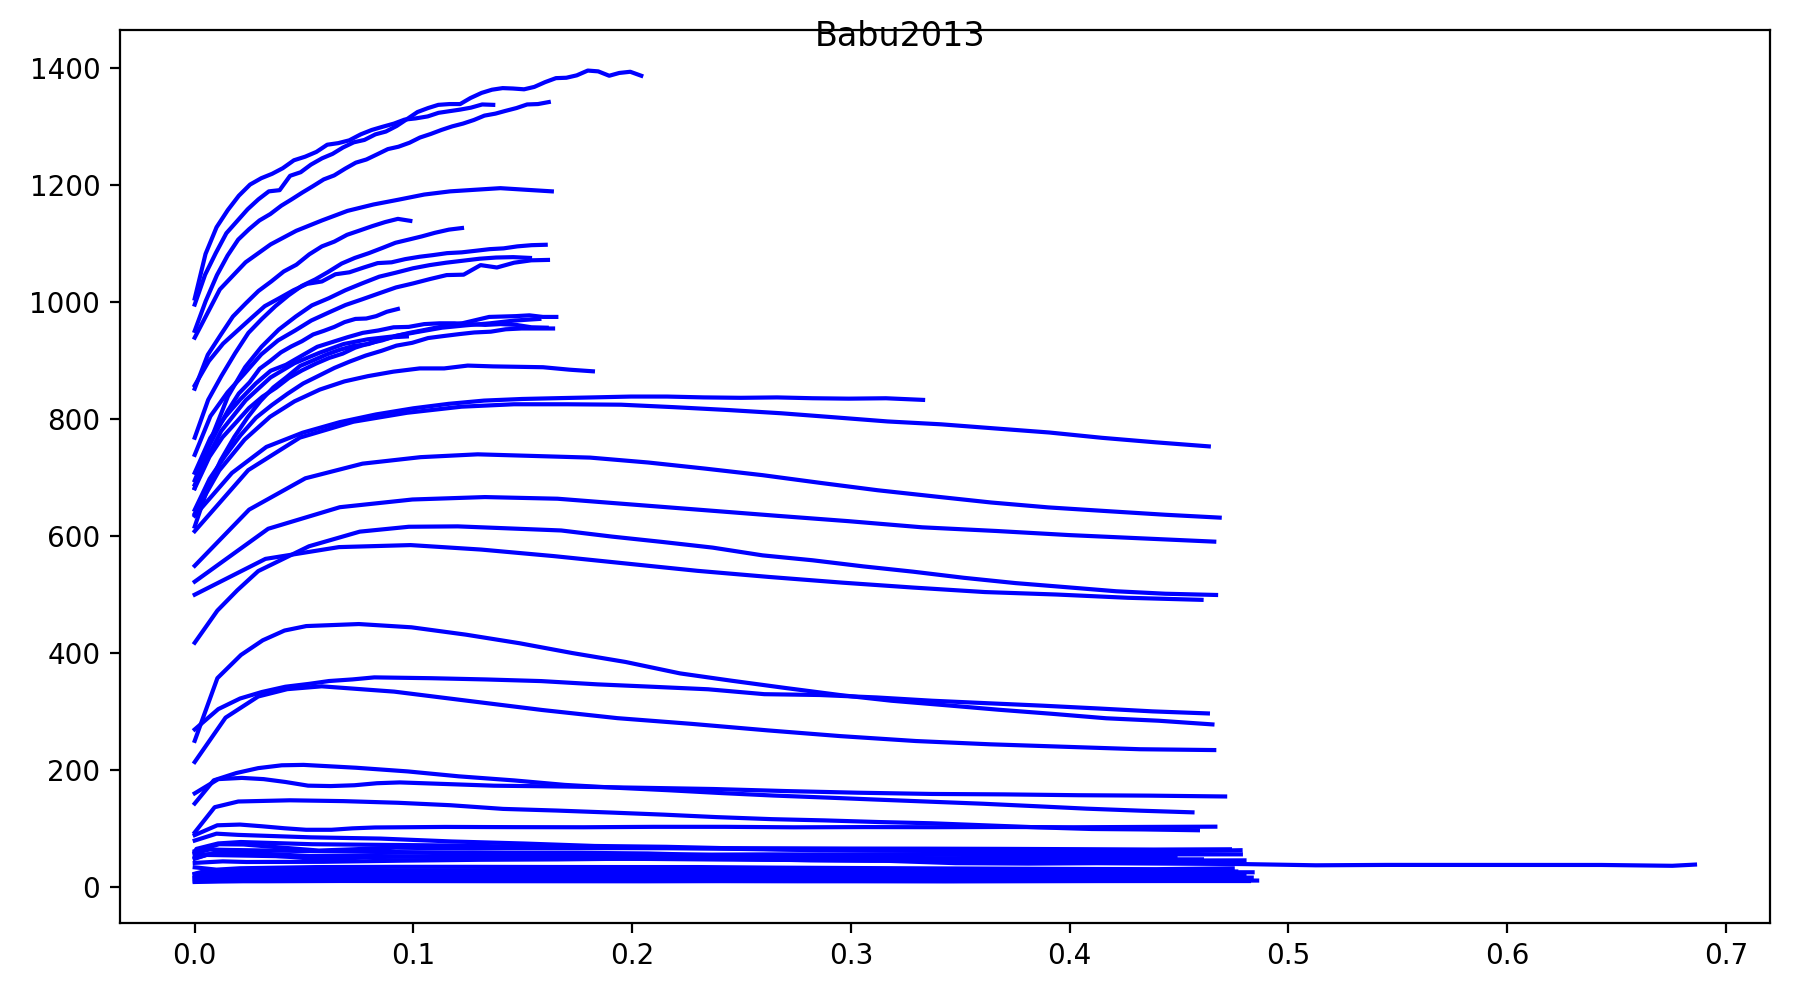

In [103]:
k = "Babu2013"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-3:]) - 0.05 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


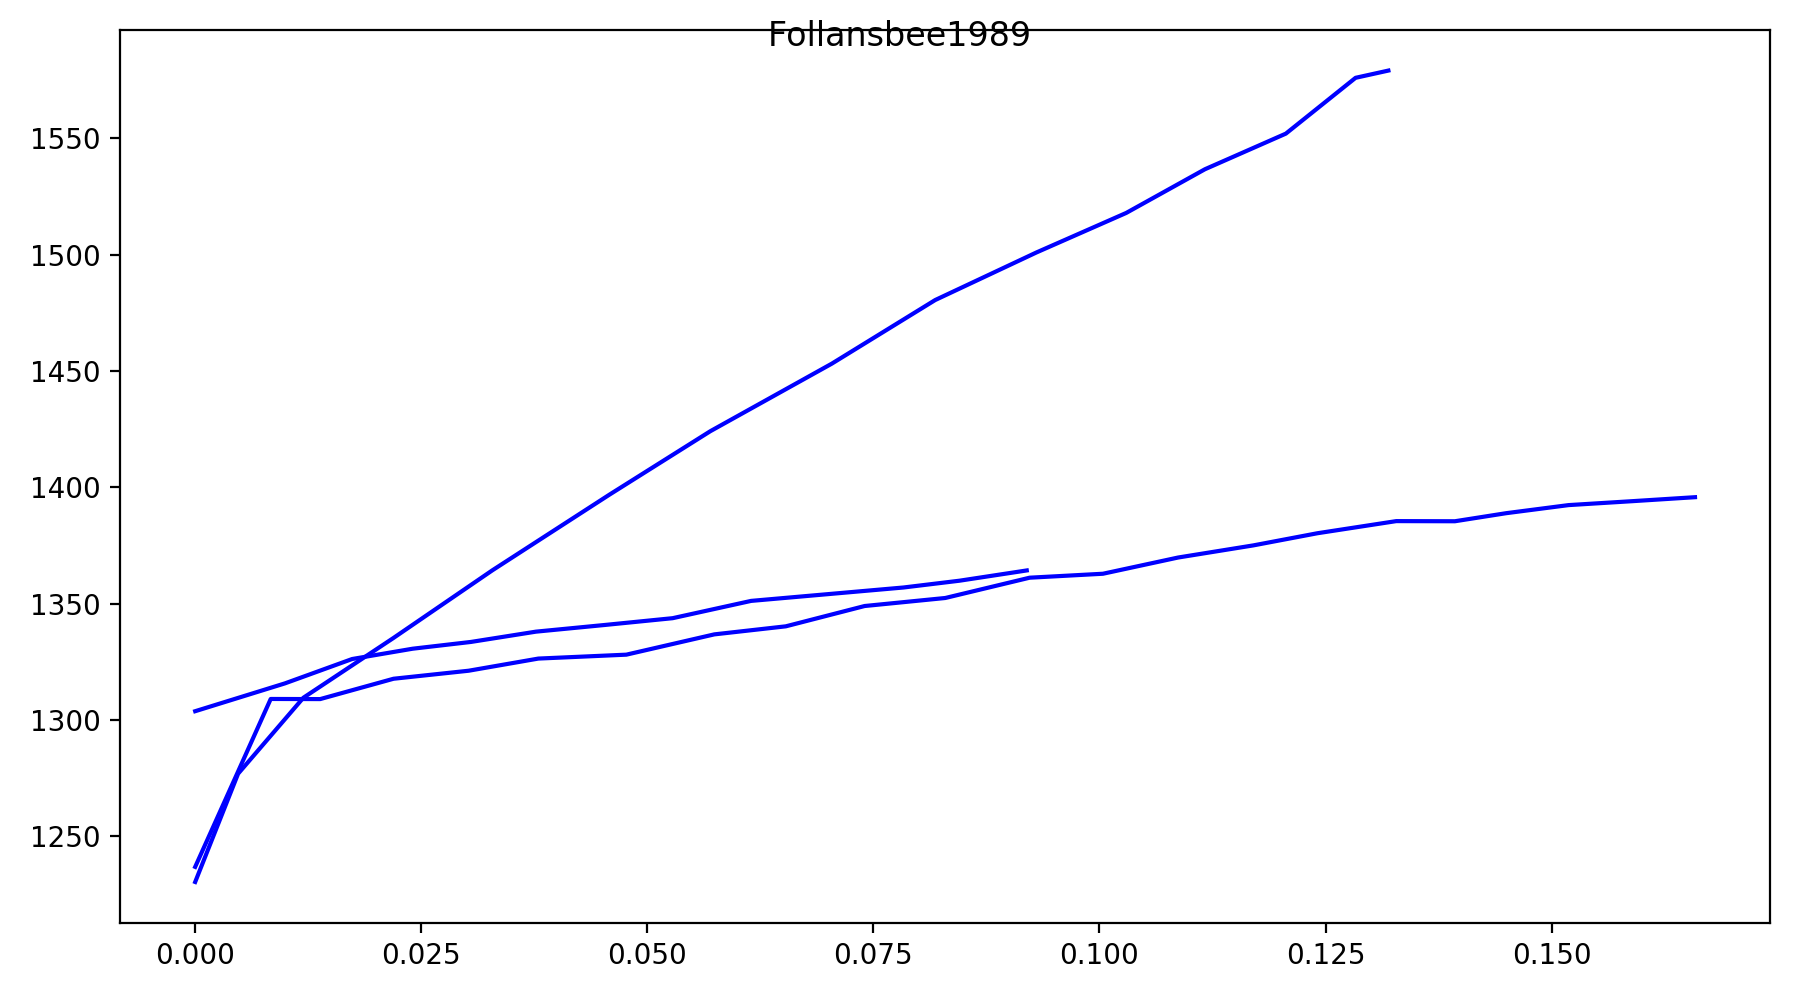

In [104]:
k = "Follansbee1989"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-3:]) - 0.02 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

The Lee 1998 data is shown as true strain but when plotted looks much like it is already been adjusted to plastic strain. The headers in the file have been adjusted subsequently.

<IPython.core.display.Javascript object>


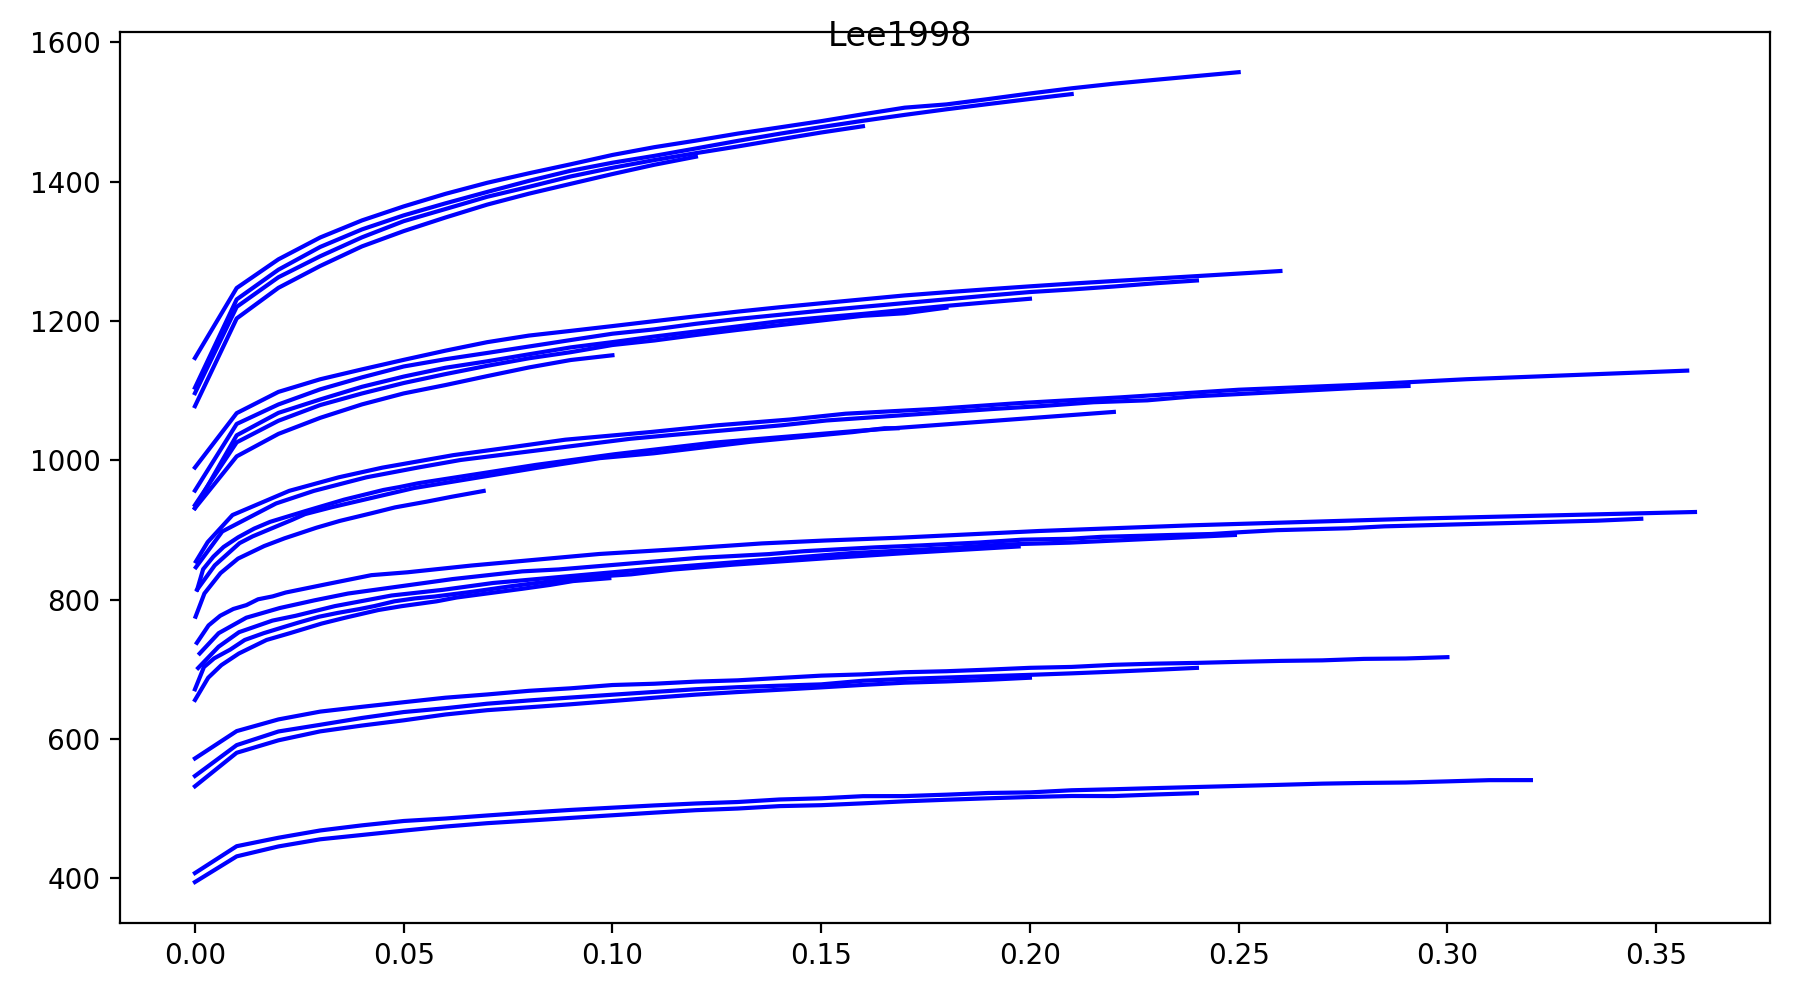

In [105]:
k = "Lee1998"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-3:]) - 0.02 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


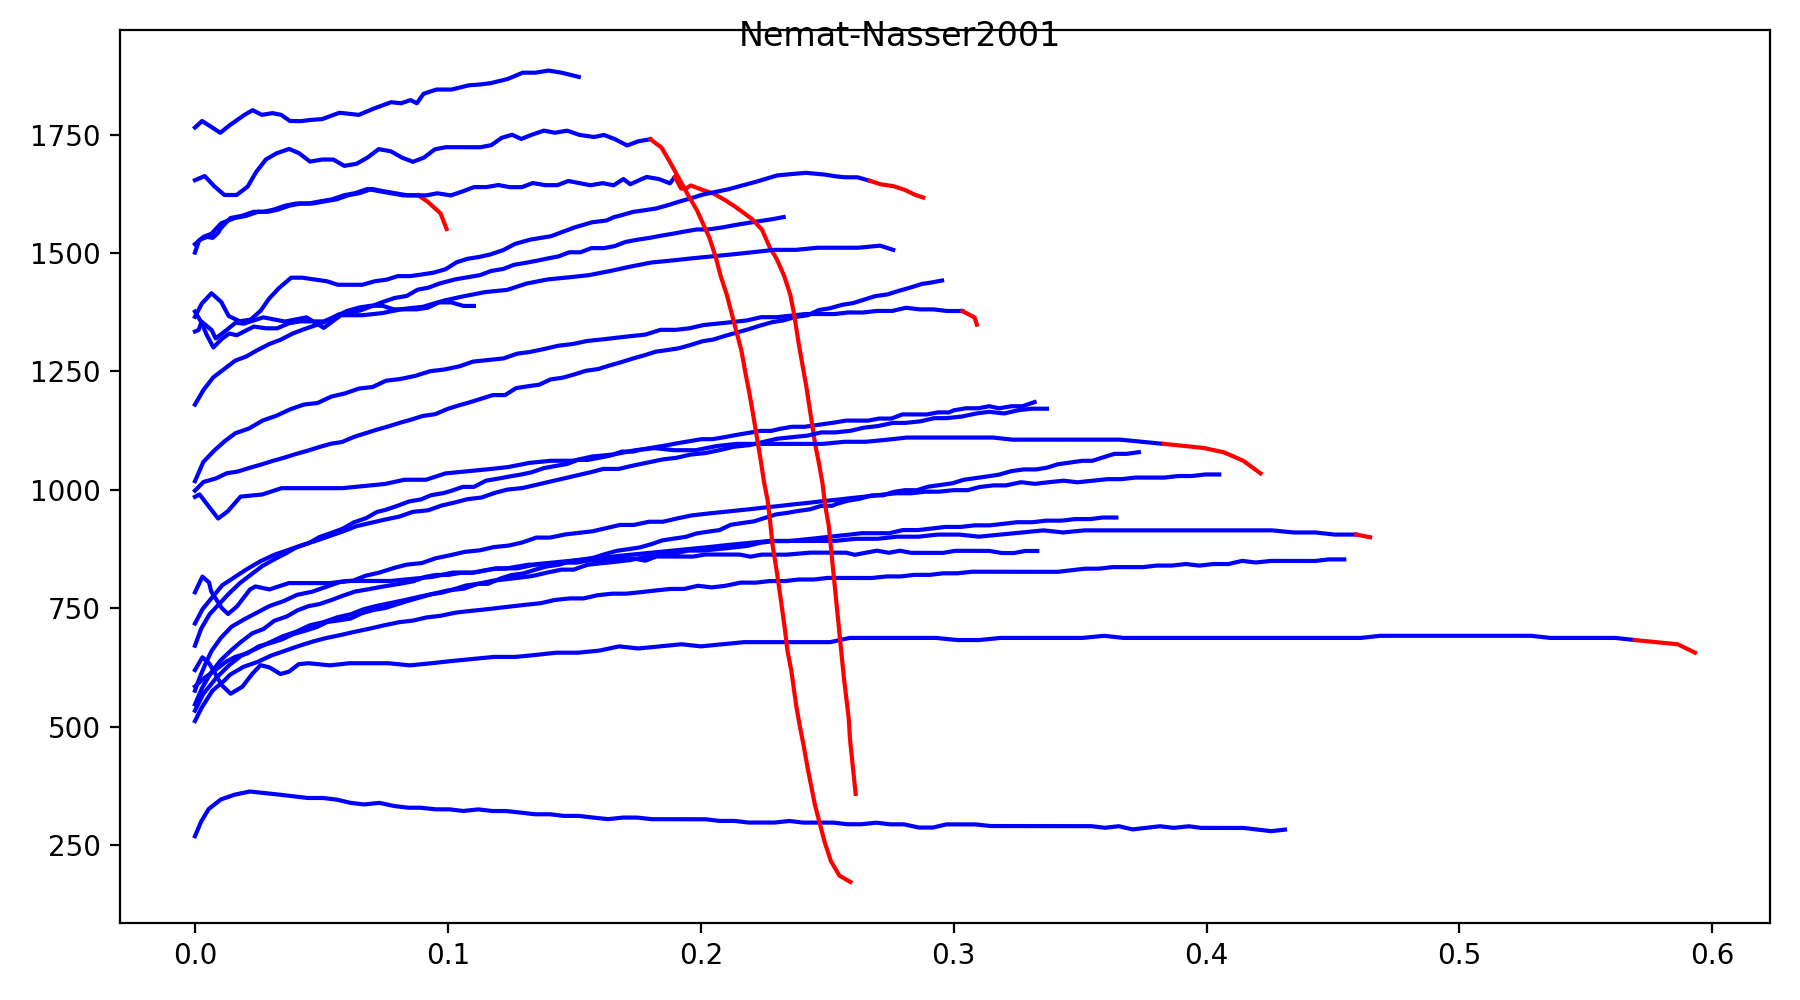

In [107]:
k = "Nemat-Nasser2001"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-5:]) - 0.01 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


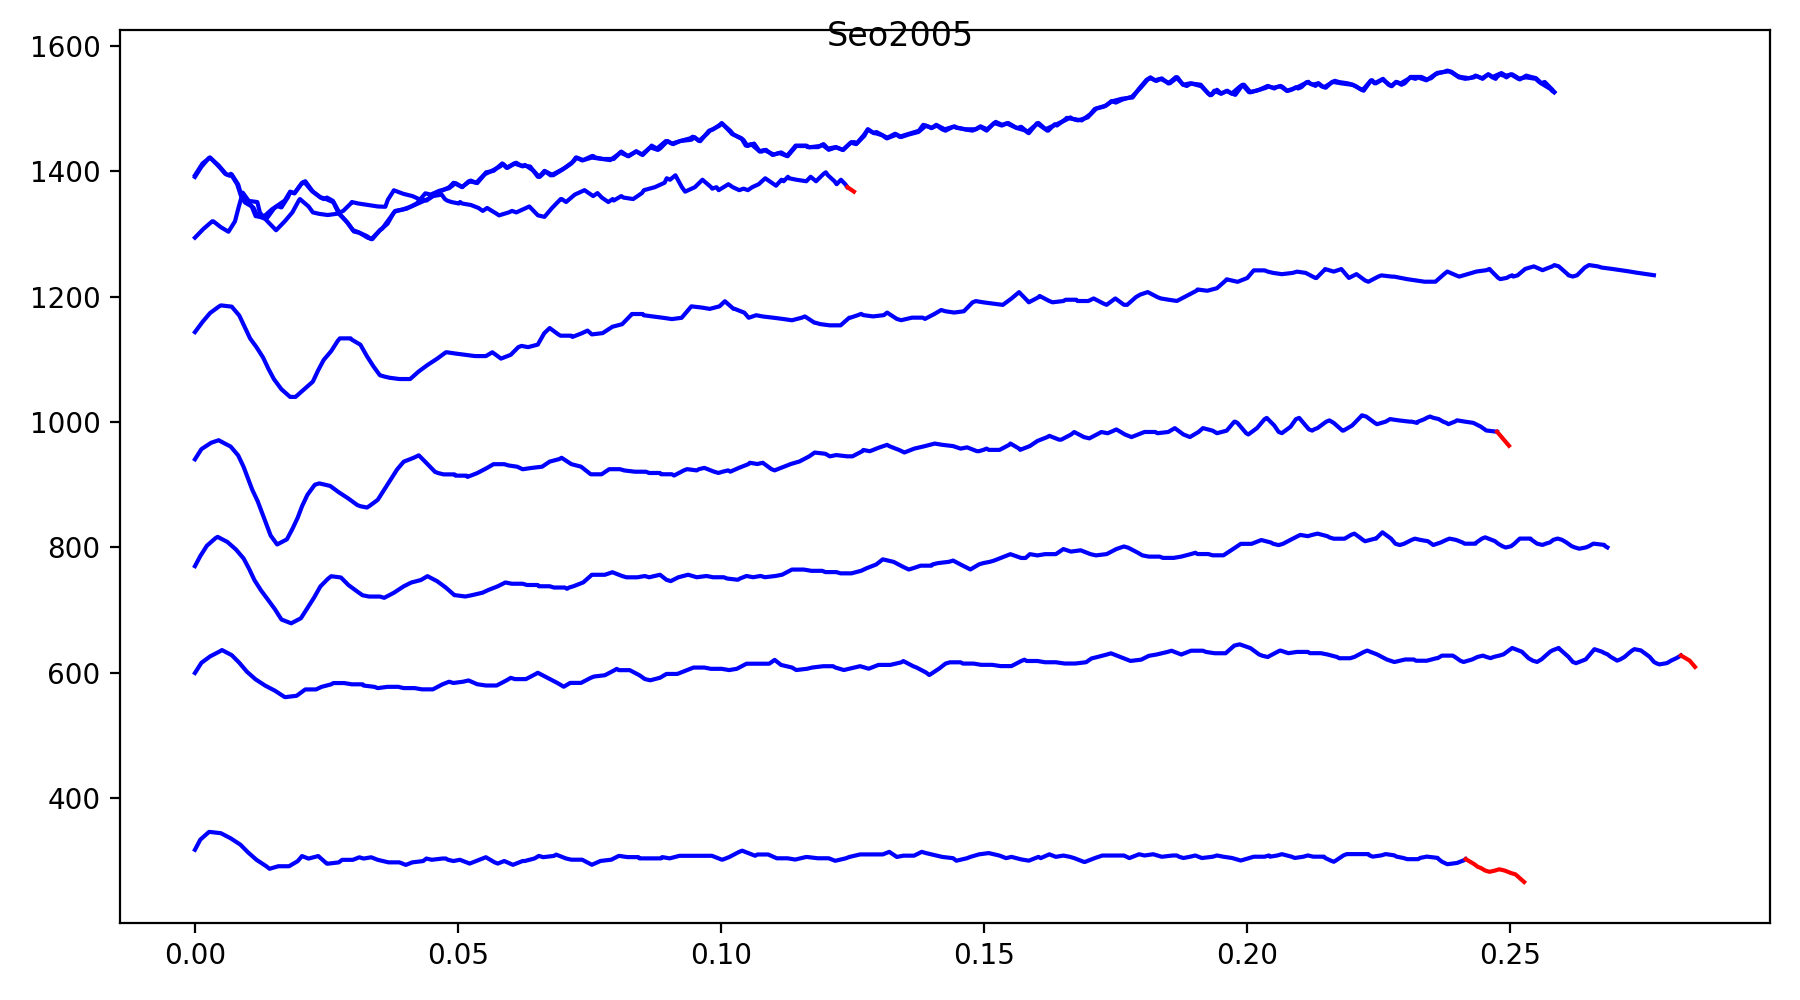

In [108]:
k = "Seo2005"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-10:]) - 0.02 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


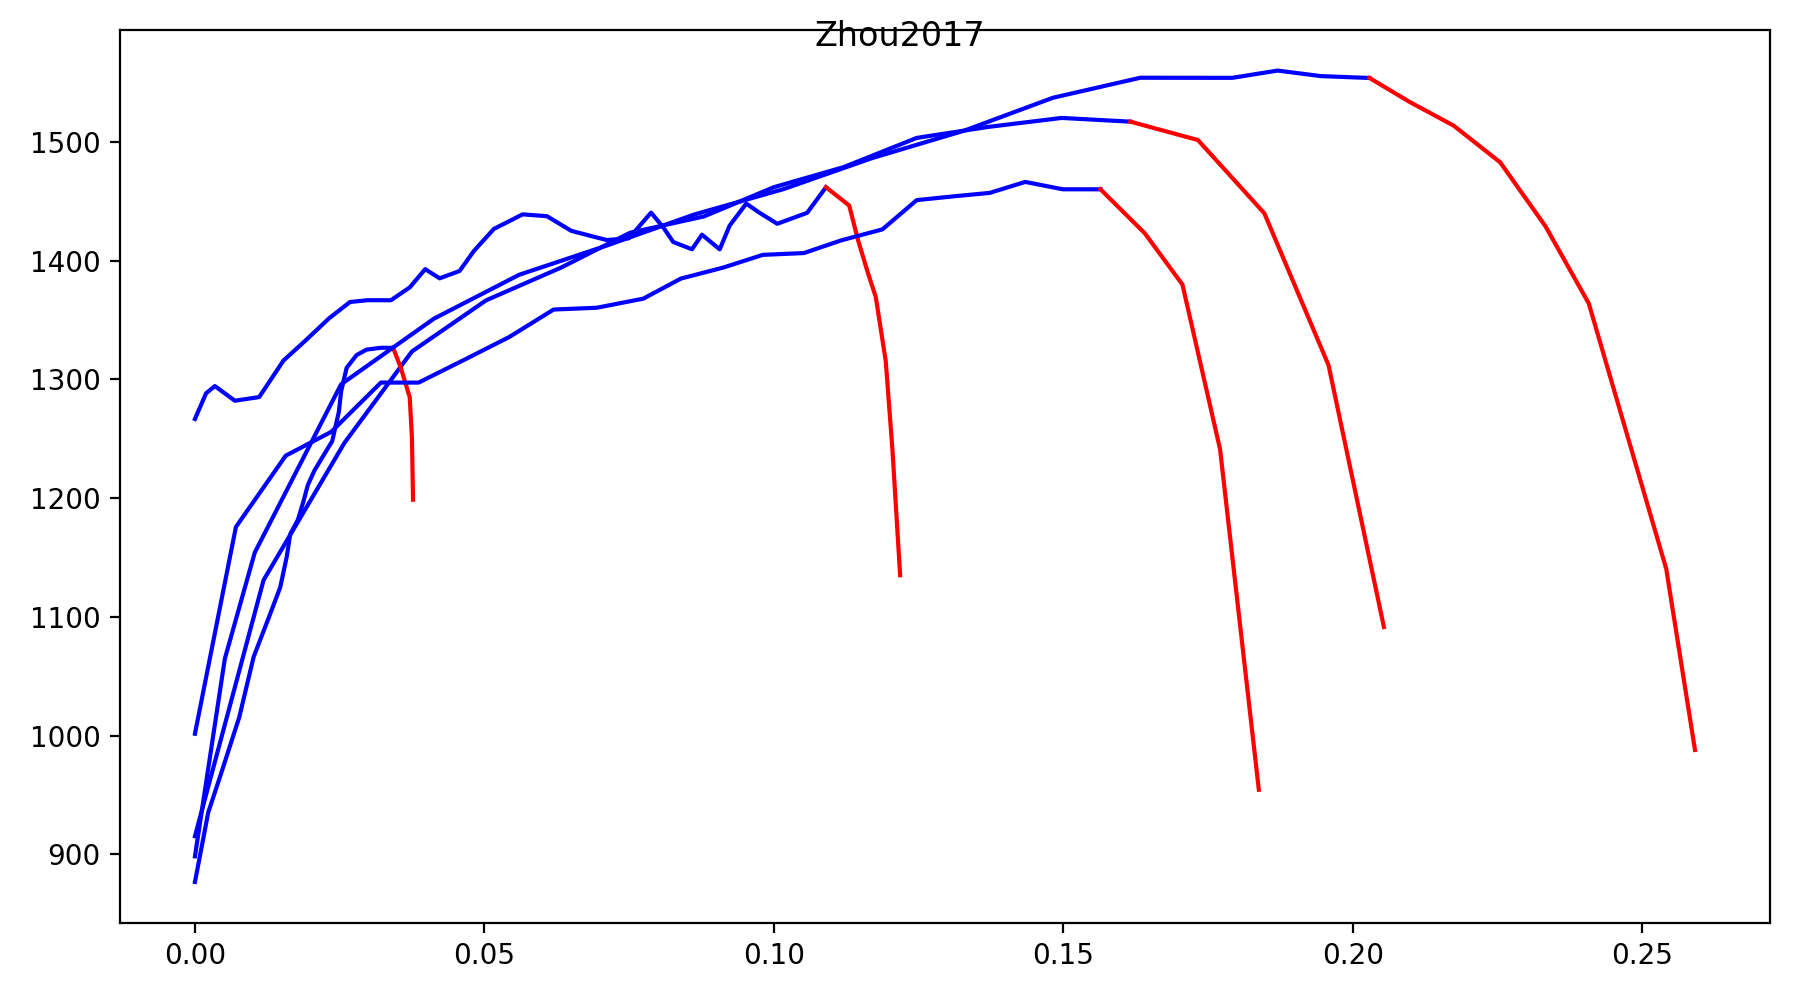

In [109]:
k = "Zhou2017"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-3:]) - 0.01 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


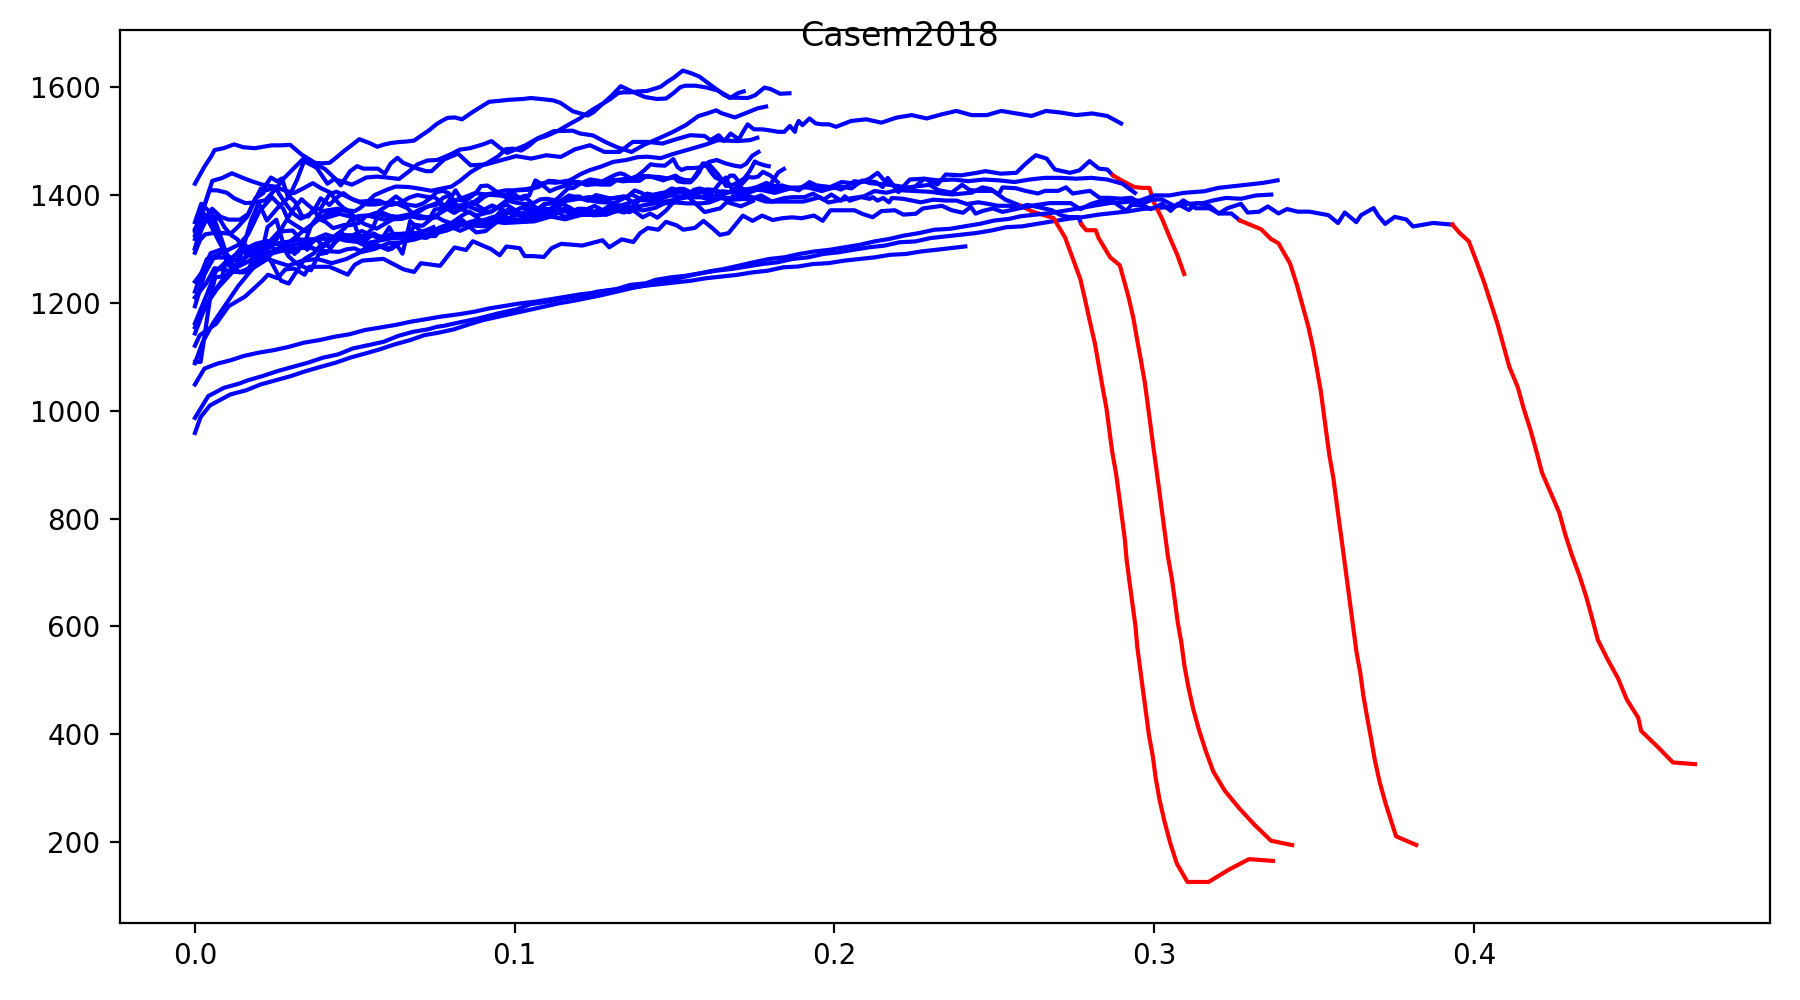

In [110]:
k = "Casem2018"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-10:]) - 0.03 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


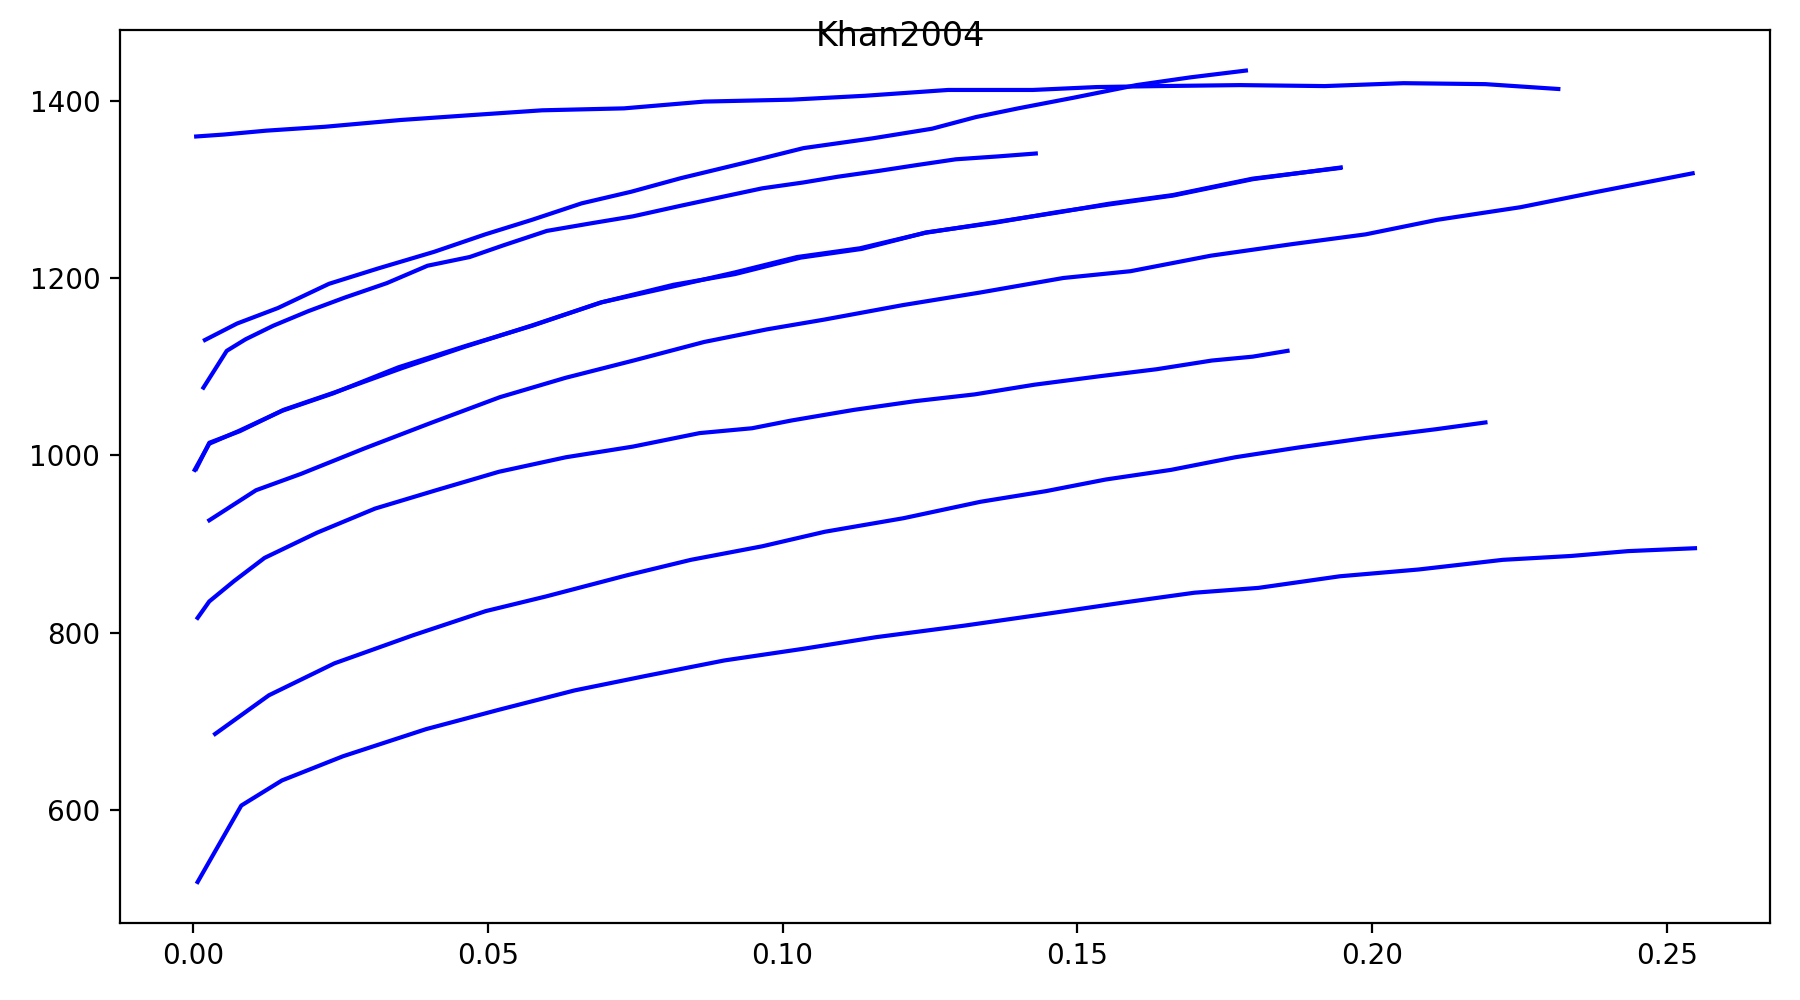

In [111]:
k = "Khan2004"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-10:]) - 0.03 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


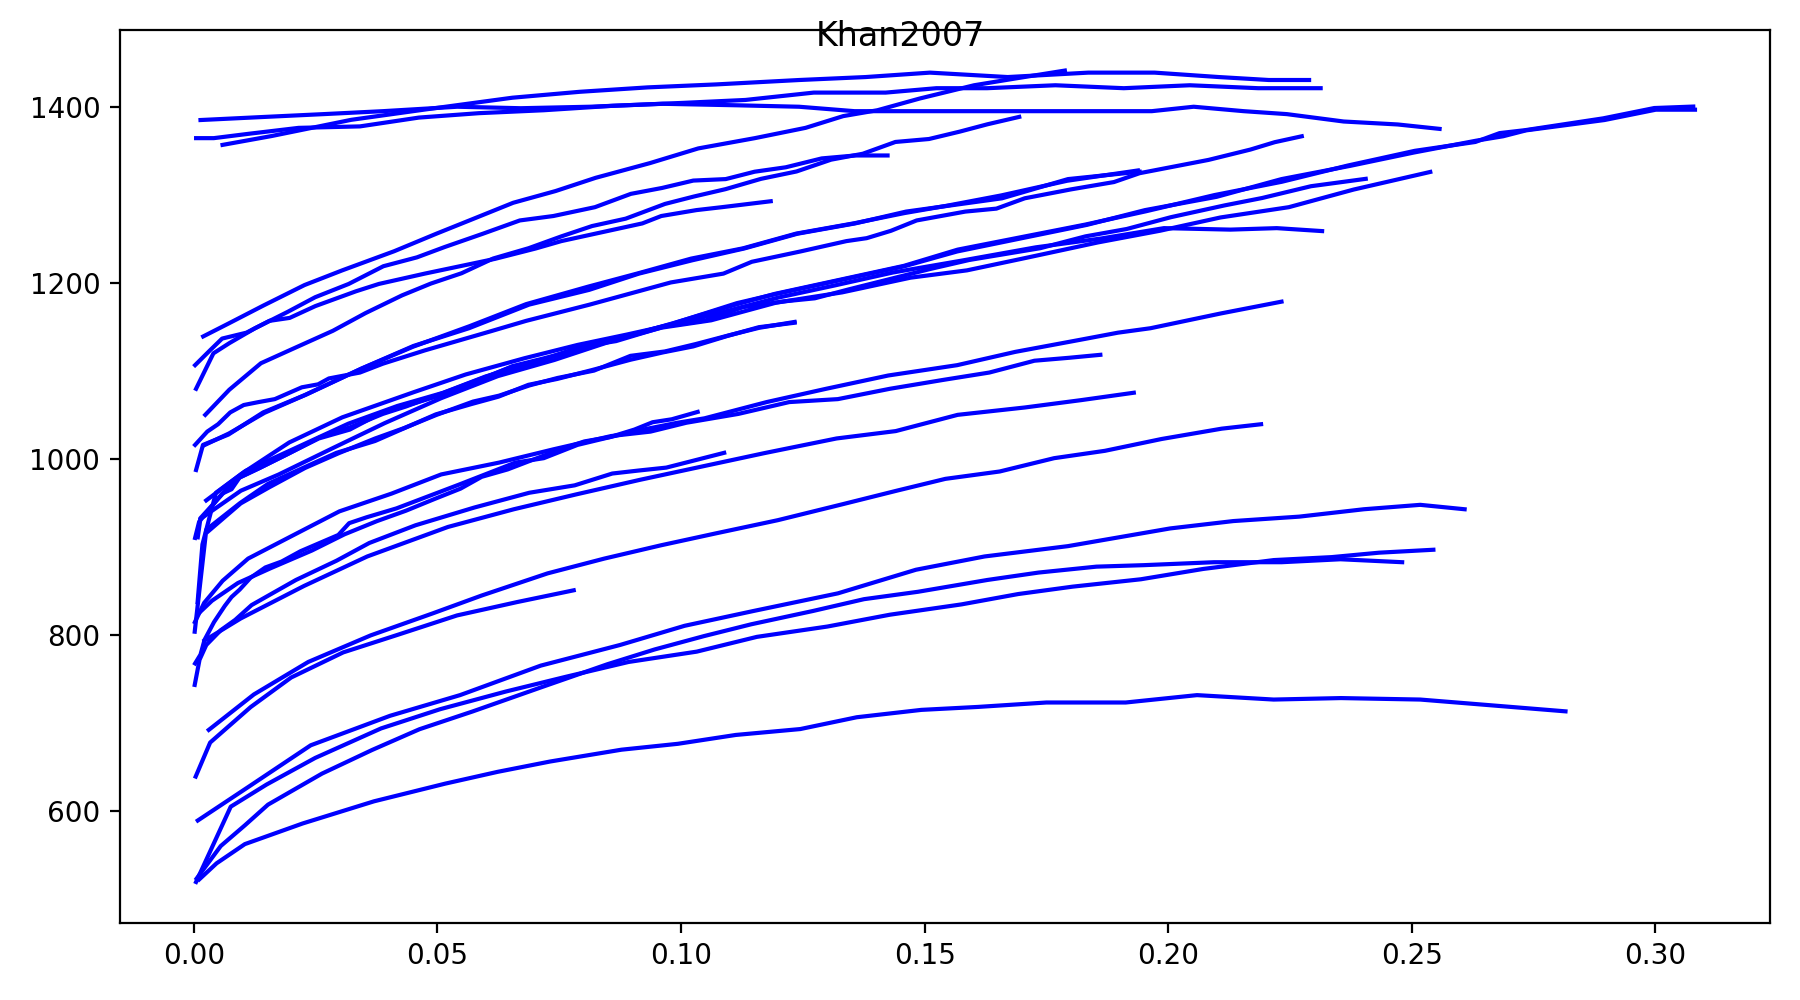

In [112]:
k = "Khan2007"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-10:]) - 0.03 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()

<IPython.core.display.Javascript object>


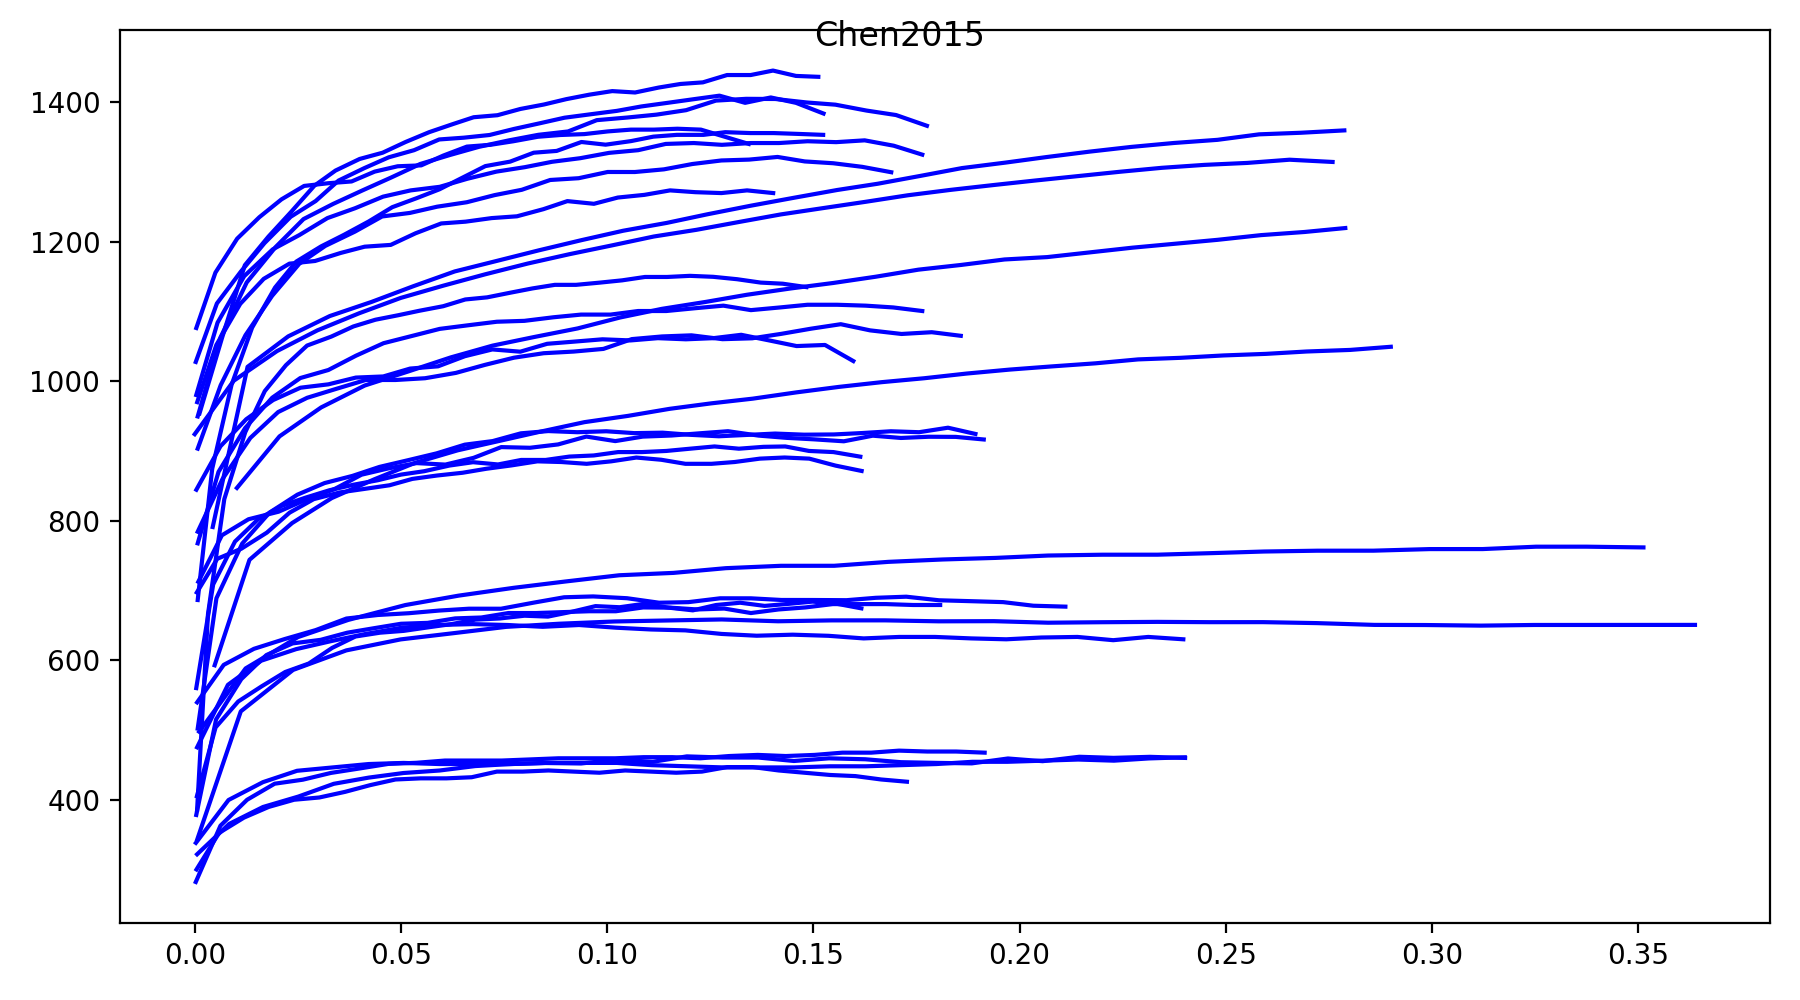

In [113]:
k = "Chen2015"
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(9, 5))
for ii, kk in enumerate(name_dict[k]):
    #     fig3Flag = 'Fig3' in kk
    x = name_dict[k][kk]["Plastic strain"]
    y = name_dict[k][kk][" stress (MPa)"]

    # Plot original and offset results

    clipped = False
    x_clip = []
    y_clip = []
    while y.iloc[-1] <= (max(y.iloc[-5:]) - 0.04 * max(y)):
        clipped = True
        x_c, x = x.iloc[-1], x.iloc[:-1]
        y_c, y = y.iloc[-1], y.iloc[:-1]
        x_clip.append(x_c)
        y_clip.append(y_c)
    if clipped:
        x_clip.append(x.iloc[-1])
        y_clip.append(y.iloc[-1])
    ax1.plot(x, y, color="b")
    ax1.plot(x_clip, y_clip, color="r")

    if clipped:
        # Read old .csv file and write new plastic strain/stress data
        true_filename = os.path.join(location, k, kk) + ".Plast.csv"
        true_lines = []
        with open(true_filename, "r") as fr:
            for linenum, line in enumerate(fr):
                if linenum < 18:
                    true_lines.append(line)
        os.rename(true_filename, os.path.join(location, k, kk) + ".Plast.OLD")

        # Write new .csv file with plastic strain
        plastic_filename = os.path.join(location, k, kk) + ".Plast.csv"
        plastic_lines = []
        for strain_index, plast_strain in enumerate(x):
            strain_string = "{eps:.6}, {omega:.6}\n".format(
                eps=plast_strain, omega=y[strain_index]
            )
            plastic_lines.append(strain_string)

        write_lines = true_lines + plastic_lines
        with open(plastic_filename, "w") as fw:
            for write_line in write_lines:
                fw.write(write_line)

#     if clipped:
#         break


fig.suptitle(k, fontsize=12)
plt.tight_layout()